<a href="https://colab.research.google.com/github/Techvolutions05/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Anell_Santos_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [73]:
# importing the url and coverting t dataframe

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [74]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0            0
Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)
sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [76]:
sample1['ConvertedSalary'].mean()

55752.2

In [77]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust more the 'sample1' because sample size is 200 which is more than 20. which means a more precise result.

A non technical audience would have a hard time to identify which one is more trustworthy. However if we can explain that sample = 20 people and sample1 = 200. They mmight have an idea of which one could be more on point.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Yes, looking at both samples means. There could be roughtly about 12799.0 sampling error. 

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We can use confidence interval to show the margin of error to a non-technical reader to have an idea how far off we could be from our sample estimates.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [78]:
def confidence_interval(data, confidence=.95):
  # Using pandas Series
  sample = pd.Series(data)
  # sample mean
  x_bar = sample.mean()
  # Standar Diviation
  s = sample.std()
  # sample size
  n = len(sample)
  # T Statistic - correspond to our codnfidence lvl. and our degree of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # standar error
  std_err = s / np.sqrt(n)
  # margin of error
  moe = std_err * t
  # lower and upper bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(sample1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [79]:
def confidence_interval(data, confidence=.95):
  # Using pandas Series
  sample = pd.Series(data)
  # sample mean
  x_bar = sample.mean()
  # Standar Diviation
  s = sample.std()
  # sample size
  n = len(sample)
  # T Statistic - correspond to our codnfidence lvl. and our degree of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # standar error
  std_err = s / np.sqrt(n)
  # margin of error
  moe = std_err * t
  # lower and upper bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(sample2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

Sample1 has a wider confidence_interval interval due to the low sample size being measured

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

It means how far off the lower and upper bound measurements are from the mean.

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

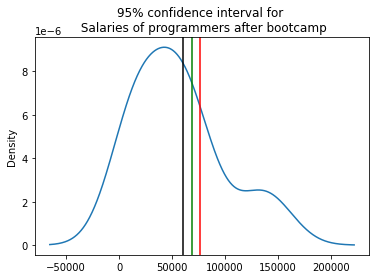

In [80]:
# Creating a density plot to graphicaly represent the confidence interval
# Practicing syntax typing

ci1 = confidence_interval(sample1['ConvertedSalary'])
ci2 = confidence_interval(sample2['ConvertedSalary'])

sample1['ConvertedSalary'].plot.density()
plt.axvline(ci2[0], color='black')
plt.axvline(ci2[1], color='green')
plt.axvline(ci2[2], color='red')
plt.title('95% confidence interval for \n Salaries of programmers after bootcamp')
plt.show()

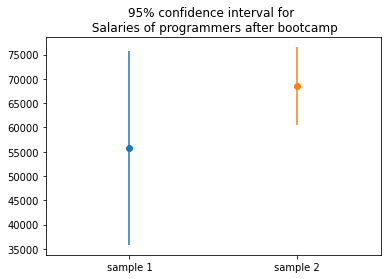

In [81]:
# Using plt.errorbar 
plt.errorbar(x=0, y=ci1[1], yerr=(ci1[2]-ci1[1]), fmt='o')
plt.errorbar(x=1, y=ci2[1], yerr=(ci2[2]-ci2[1]), fmt='o')
plt.title('95% confidence interval for \n Salaries of programmers after bootcamp')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

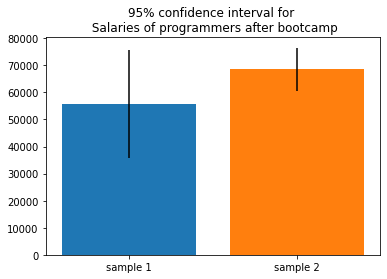

In [82]:

plt.bar(x=0, height=ci1[1], yerr=(ci1[2]-ci1[1]))
plt.bar(x=1, height=ci2[1], yerr=(ci2[2]-ci2[1]))
plt.title('95% confidence interval for \n Salaries of programmers after bootcamp')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [0]:
df2 = df.sample(2761, random_state=42)

In [84]:
def confidence_interval(data, confidence=.95):
  # Using pandas Series
  sample = pd.Series(data)
  # sample mean
  x_bar = sample.mean()
  # Standar Diviation
  s = sample.std()
  # sample size
  n = len(sample)
  # T Statistic - correspond to our codnfidence lvl. and our degree of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # standar error
  std_err = s / np.sqrt(n)
  # margin of error
  moe = std_err * t
  # lower and upper bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(df2.all())

(0.7903475541388716, 0.9333333333333333, 1.076319112527795)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is the closest measurements of two or more values to each other.

However, Accuracy refers to the closeness of a measured value standard or known value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

Is an estimate measurement of the posible value of the sample size mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

# Answer 1:


In [0]:
sample3 = df.sample(2761, random_state=42)

In [86]:
def confidence_interval(data, confidence=.95):
  # Using pandas Series
  sample = pd.Series(data)
  # sample mean
  x_bar = sample.mean()
  # Standar Diviation
  s = sample.std()
  # sample size
  n = len(sample)
  # T Statistic - correspond to our codnfidence lvl. and our degree of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # standar error
  std_err = s / np.sqrt(n)
  # margin of error
  moe = std_err * t
  # lower and upper bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(sample3['ConvertedSalary'])

(71299.82986224785, 73453.40420137631, 75606.97854050477)

#Answer 1:2


In [87]:
stats.ttest_1samp(sample3['ConvertedSalary'], 75606.97855)

Ttest_1sampResult(statistic=-1.960823882392076, pvalue=0.04999999899058571)

The P vale is 0.04

# Answer 1:3

In [88]:
stats.ttest_1samp(sample3['ConvertedSalary'], 75606.97854)

Ttest_1sampResult(statistic=-1.9608238732870988, pvalue=0.050000000053660974)

The P.value is 0.05

If the P value is less than our significance (alpha) level, the hypothesis test is statistically significant.

In [0]:
column_names = ["party", "handicapped-infants",
          "water-project-cost-sharing",
          "adoption-of-the-budget-resolution",
          "physician-fee-freeze",
          "el-salvador-aid",
          "religious-groups-in-schools",
          "anti-satellite-test-ban",
          "aid-to-nicaraguan-contras",
          "mx-missile",
          "immigration",
          "synfuels-corporation-cutback", 
          "education-spending",
          "superfund-right-to-sue",
          "crime",
          "duty-free-exports", 
          "export-administration-act-south-africa"] #  <-- While not required placing a comma here can be helpful when going back and ammending / adding to your code 
         

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_names)

In [96]:

df = df.replace({'y': 1, 'n': 0, '?':np.NaN})
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']


In [98]:
dem.shape

(267, 17)

In [0]:
sample4 = dem.sample(267, random_state=17)

In [111]:
def confidence_interval(data, confidence=.95):
  # Using pandas Series
  sample = pd.Series(data)
  # sample mean
  x_bar = sample.mean()
  # Standar Diviation
  s = sample.std()
  # sample size
  n = len(sample)
  # T Statistic - correspond to our codnfidence lvl. and our degree of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # standar error
  std_err = s / np.sqrt(n)
  # margin of error
  moe = std_err * t
  # lower and upper bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)
print('Handicapped-Infant:') 
confidence_interval(sample4["handicapped-infants"])


Handicapped-Infant:


(0.545623046681152, 0.6046511627906976, 0.6636792789002433)

In [112]:
print('water-project-cost-sharing:')
confidence_interval(sample4['water-project-cost-sharing'])

water-project-cost-sharing:


(0.4417180951442038, 0.502092050209205, 0.5624660052742062)

In [113]:
print('adoption-of-the-budget-resolution:')
confidence_interval(sample4['adoption-of-the-budget-resolution'])

adoption-of-the-budget-resolution:


(0.8504564817145479, 0.8884615384615384, 0.9264665952085289)

In [114]:
print('physician-fee-freeze:')
confidence_interval(sample4['physician-fee-freeze'])

physician-fee-freeze:


(0.026754203006701553, 0.05405405405405406, 0.08135390510140655)

In [115]:
print('el-salvador-aid:')
confidence_interval(sample4['el-salvador-aid'])

el-salvador-aid:


(0.16602906090451375, 0.21568627450980393, 0.2653434881150941)

"handicapped-infants",
          "water-project-cost-sharing",
          "adoption-of-the-budget-resolution",
          "physician-fee-freeze",
          "el-salvador-aid",
          "religious-groups-in-schools",
          "anti-satellite-test-ban",
          "aid-to-nicaraguan-contras",
          "mx-missile",
          "immigration",
          "synfuels-corporation-cutback", 
          "education-spending",
          "superfund-right-to-sue",
          "crime",
          "duty-free-exports", 
          "export-administration-act-south-africa"